In [83]:
from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm
from jmetal.operator import BinaryTournamentSelection, PolynomialMutation, SBXCrossover
from jmetal.problem.singleobjective.unconstrained import Rastrigin
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.core.solution import FloatSolution
import math
import numpy as np
import matplotlib.pyplot as plt



Defining class for Shifted Rastrigin with given parameters

In [84]:
class ShiftedRastrigin(Rastrigin):

    def evaluate(self, solution: FloatSolution) -> FloatSolution:
        shift = [
        3.84659435985590650000	,	4.32362205743831400000	,	-2.82162936954134660000	,	0.64653817598325247000	,	4.33820186507238860000	,	2.44086997163238270000	,	-3.45931024094417690000	,	2.33705875868148190000	,	3.97998055845581790000	,	4.29001432377431870000	,	2.37393205013967900000	,	3.22497677779046480000	,	-0.02357444132856745300	,	4.62738596973685290000	,	4.61343548806945060000	,	0.99472289660911883000	,	1.61013771594735380000	,	-4.72534651890507180000	,	-2.69746520854975190000	,	1.03554783612756030000	,	-3.20479347565686280000	,	3.80570384213743300000	,	-2.67825376696940950000	,	-3.22904694383140530000	,	4.41155071547800230000	,	0.71588795412156880000	,	-4.42193783023913410000	,	1.49159450028917990000	,	0.73886515440924061000	,	2.17939203431947700000	,	-3.27775808051280390000	,	2.78361458030800430000	,	3.59618722428571940000	,	-4.71920145963546120000	,	0.51737211903540103000	,	-3.60436016313426500000	,	-3.20398391316968570000	,	0.46834593997223894000	,	-2.03018571769825940000	,	-0.39847622798595861000	,	-3.77110777709327880000	,	4.96803420032206410000	,	4.32145012226136770000	,	3.35468721097956820000	,	-4.86572422704170030000	,	4.83206725560307860000	,	0.21250489640939652000	,	-4.27497782384513860000	,	3.68403046219052220000	,	4.78742874105958190000	,	-4.08430713301539240000	,	3.42023681137689910000	,	-2.35468324182235960000	,	1.24216769847776120000	,	0.48673780445719039000	,	-2.25401845871946890000	,	-3.34869931635213280000	,	2.67696967257104030000	,	-0.52956976681378798000	,	-3.83108806452909570000	,	3.02184177001129580000	,	-3.09146211527791870000	,	4.19477292777768970000	,	-1.34881226134492490000	,	3.46887851258654760000	,	3.06580510670824320000	,	0.26927432711349120000	,	-1.12314391029412340000	,	2.34127028872317490000	,	0.28629115533644356000	,	2.42005490213420060000	,	3.49876055752973160000	,	1.38995774976960900000	,	0.11681844620488135000	,	-4.67812330654757160000	,	-2.17060403488057660000	,	4.15902718307393830000	,	3.48530827699488020000	,	3.24522547271993390000	,	-4.37165924178428260000	,	4.69947407052000980000	,	3.86886805426119730000	,	2.64071860684072310000	,	1.85826681439607370000	,	4.70938100649540740000	,	-0.13341202353625903000	,	-4.24859539535957340000	,	-0.45585467139328095000	,	1.14761344547568990000	,	1.14068904332716240000	,	4.21912724335195580000	,	0.75180418620409384000	,	-0.37611153830536903000	,	-1.27392864603717990000	,	-0.45903032937348964000	,	-2.23822070531123000000	,	-4.85371159484915720000	,	4.58196911633225310000	,	1.17987248535943580000	,	2.25731722185323580000	,
        -0.74687226990934441000	,	-4.32996373387903160000	,	-2.96893944676675850000	,	-0.93821254682555910000	,	-3.76538979628983660000	,	-1.71287739867569040000	,	-1.51746149243441850000	,	-4.93855084648486730000	,	0.32859060545807850000	,	0.35387435981415560000	,	1.53559437199688630000	,	2.60413811032178530000	,	3.42795223773113200000	,	2.22916381687181180000	,	-3.71913189028108440000	,	-0.22131587997362878000	,	4.38097087844250050000	,	-0.56322569059145433000	,	-2.55842175460648800000	,	-3.82576797137672790000	,	-1.94916916321552150000	,	-0.74888196870716150000	,	-2.84791686245635440000	,	0.38554863319186783000	,	-3.78648333457011520000	,	-0.90420601682842250000	,	1.28684102391585590000	,	3.71425952445820510000	,	0.47305470527811888000	,	-4.56220127266064870000	,	-4.21045147614207590000	,	-1.17246189280217910000	,	3.70743639115060650000	,	-1.77569501263565940000	,	2.71998368251837160000	,	1.31043779631161430000	,	2.94006004474756820000	,	4.60748301682731310000	,	-4.78040111702889090000	,	-3.88054742242878080000	,	-3.16423797581683490000	,	4.25616461387242670000	,	1.68222267359678310000	,	-0.13810535504022869000	,	3.36761600846266520000	,	-0.55093220488030781000	,	-0.02204628160280908100	,	-0.02655998260656655700	,	-1.69475374274010490000	,	3.72195059427849270000	,	2.22329543699955150000	,	3.90542964189744170000	,	-2.05518762543488980000	,	-0.48407041617786106000	,	0.87681728419933691000	,	-3.51409861019323920000	,	2.89971771960807520000	,	3.95767066130325060000	,	-4.89211058279228970000	,	-1.07864127649285460000	,	0.48440541941322302000	,	-1.67248405360006510000	,	-3.17537268258418410000	,	-2.30943139579173360000	,	1.18631620979269140000	,	-3.64351633360777250000	,	0.06025187690761946200	,	-4.56830093364986120000	,	2.34381005248501050000	,	-1.82865540072475690000	,	-1.00758043824160560000	,	-1.60036918152803320000	,	2.16578693023990710000	,	0.91980784262414517000	,	3.48612670091810980000	,	-4.78607068680704370000	,	1.27625784200531460000	,	3.51605118895363770000	,	1.62042986335280760000	,	4.69734019764048760000	,	4.25837088518724730000	,	1.95177257879044670000	,	-2.42143981614357130000	,	-0.00750108561007412080	,	-3.90520528356937510000	,	-0.33199366381132212000	,	3.87190546230943160000	,	1.66043988850848300000	,	3.81326123805721910000	,	4.89439319155589380000	,	3.52166329499369720000	,	-0.45727792938793588000	,	-3.16292174575285360000	,	-0.42268982793566323000	,	-1.58827898773343800000	,	3.59818657549848450000	,	1.64418838827934090000	,	4.51803427839436540000	,	4.61474947355094400000	,	2.20988508015913610000	,
        -2.57100316818393710000	,	2.31496349285293060000	,	-2.49207945467588620000	,	2.17648971322415010000	,	-1.64492420692119800000	,	-4.67714933619784290000	,	-3.29956980295154080000	,	-2.22847982100926160000	,	-4.08906437158794670000	,	2.54297744986986450000	,	2.58942130003474790000	,	3.82610841866989840000	,	1.71198754741557750000	,	0.04742946930741709400	,	-1.63773207577869420000	,	-4.28129265309231320000	,	0.96227004853813636000	,	3.21840858439873050000	,	4.63582554032944930000	,	-3.39642515770465000000	,	1.89598974536023410000	,	0.39358005338605651000	,	-2.58470820925039390000	,	2.49670609988593740000	,	-2.95196042093257340000	,	-2.04348332823653140000	,	1.14619111412126350000	,	-0.82386354631573688000	,	-1.44133030415175560000	,	3.19420810471803480000	,	3.66533495688334730000	,	0.43536656872110502000	,	2.76679223172648040000	,	0.79880766583938634000	,	-3.22982798521234790000	,	-2.80992376343860520000	,	-0.56208411944273262000	,	4.03176276816847330000	,	1.94137650026374690000	,	-1.73053797428780600000	,	3.84449293042062300000	,	1.02068808592065350000	,	3.62301871361504620000	,	-1.63468027331510780000	,	2.54459609679157060000	,	-2.01882006256177160000	,	-3.97577107241811720000	,	2.93656480559825360000	,	-0.10277800310991214000	,	-3.22215355542912140000	,	0.55881447589876654000	,	-3.33129817323933340000	,	2.80120908727222600000	,	1.05322393149736020000	,	-2.27571380486834010000	,	-3.97360835742390780000	,	0.51143755251028900000	,	4.99318151917456280000	,	1.36343786525209690000	,	0.91355587117620729000	,	4.86149637945286630000	,	1.63848845594704430000	,	-3.01003826250214600000	,	-4.27265858591698320000	,	-4.27507691848955230000	,	-2.92628348322306440000	,	-0.80800426001205938000	,	0.23936558708710720000	,	2.17759630565334740000	,	3.42434796997301480000	,	1.72854677628255350000	,	-4.49566518846878080000	,	-2.11022042980450570000	,	-4.03002054646941500000	,	-1.99784576434443690000	,	1.54848478280930380000	,	-1.27619147404443560000	,	1.25506287683774160000	,	3.58541212795461740000	,	4.45625498033470540000	,	1.12731106916754790000	,	1.41322928604926190000	,	0.54175586406694709000	,	-2.77323347897030810000	,	-1.02957479610847000000	,	1.58566838962480450000	,	2.10954915707857180000	,	2.98041416079261800000	,	-4.67184750563062410000	,	0.13630176621454559000	,	-1.23846972480408010000	,	3.18736795964296780000	,	-0.84624884974890691000	,	-3.62608305187763860000	,	1.33196927580771000000	,	3.17125467719547770000	,	-0.38034211835480036000	,	0.04785613992957493700	,	-4.21707947552753290000	,	1.58427686329916110000	,
        4.80737575425865420000	,	4.05904342482433830000	,	-3.25147144629672980000	,	-3.24452913351239710000	,	-0.84973078571786687000	,	-1.80219732193950270000	,	4.34400124493396330000	,	1.05085923170020830000	,	-1.05506182946125810000	,	2.50854415357914200000	,	4.89923941870485000000	,	-4.74147576936355450000	,	-3.01049974776724220000	,	4.74125991836961090000	,	-4.71399389737207390000	,	-1.45248128514012720000	,	-1.07537758772457750000	,	3.98770595871029880000	,	0.58257005044346588000	,	2.92569548152805400000	,	3.81127593803623730000	,	-0.95567785418438778000	,	0.27457521427282217000	,	-2.61279946211591870000	,	0.21291974050568907000	,	2.45029430002388880000	,	-3.04450175752055910000	,	-1.77060995731363580000	,	-2.55608531024024010000	,	0.32489483681645925000	,	-1.85260041717206560000	,	4.66199791029280420000	,	2.64618286871176170000	,	-1.83548023608842040000	,	-4.65031103081832240000	,	1.53117273969012670000	,	-1.16164958905454880000	,	-0.80603717973649314000	,	-2.03444730626177740000	,	2.28988544412739790000	,	-2.20227182987610700000	,	-0.68740505536672991000	,	-4.51669340284120400000	,	-1.30866211866121600000	,	2.70247003140765240000	,	-4.45713400022129490000	,	-1.11238789838970620000	,	-4.25003905241359980000	,	-3.85713615088153940000	,	2.90884087956665200000	,	4.34348591567961860000	,	2.75331061502270740000	,	-0.31442852146523492000	,	-2.75493307734147570000	,	2.05592073917892910000	,	-0.45128216178826186000	,	-4.65932659151908180000	,	-1.79378114635191380000	,	-0.14770541221403555000	,	3.39498834774340350000	,	-2.06086308476603010000	,	1.41001646755161940000	,	-0.83411764584875847000	,	-1.56412160191991310000	,	4.55847483185552700000	,	-2.44602244767784920000	,	-4.61542556461159850000	,	3.84918040360863320000	,	0.21228624444050137000	,	-0.55037006668708166000	,	-0.73048545718541558000	,	-0.02308507918480362500	,	3.33943522219268020000	,	2.74694327339450160000	,	-1.58562917510762260000	,	-2.80636578656003670000	,	4.76492065551913950000	,	-1.96536305181843930000	,	-0.45481416688355125000	,	-4.11922375006174320000	,	1.08060339765327380000	,	4.27000804398445230000	,	-2.15286870519600940000	,	3.20771078358620090000	,	0.82600491898092443000	,	3.33584032951617360000	,	-0.52445883269493532000	,	-3.97873766549337700000	,	0.74598757369066604000	,	-1.36595980221532190000	,	-0.03252877497866180100	,	-4.51407920505741430000	,	1.75418571475873720000	,	4.79320474210929780000	,	2.58806563208627250000	,	-0.89366407064644449000	,	-2.68860063230432010000	,	1.70699806153276870000	,	-2.83967643883319100000	,	-1.18905323815660240000	,
        -1.76942050775907410000	,	-0.76590786357747387000	,	3.95321604956761340000	,	1.39199484510418170000	,	3.76604016209591920000	,	1.81526669282590270000	,	-0.85162551454183077000	,	1.05165841619739720000	,	-2.44500474487795750000	,	-4.30792766918707850000	,	0.39183739807403395000	,	2.12503265915304770000	,	-1.49069727824236690000	,	-4.63332703526606340000	,	2.12951785020021940000	,	-4.05818881950695240000	,	-4.62649374624328220000	,	3.28649051457579230000	,	-1.95454789308729370000	,	3.67888034406385240000	,	2.90813857581120590000	,	-2.89932760579446610000	,	-4.59859823716304560000	,	4.87634224013042680000	,	-2.14028694955242790000	,	4.49075099889420850000	,	-4.77836072192746290000	,	-4.79922684575687790000	,	-1.62250189055096470000	,	4.74230397963269820000	,	3.65758375742753650000	,	3.35620560560784750000	,	4.99291418808923200000	,	2.31775698007379920000	,	-3.79880812659146730000	,	3.78467728975569170000	,	-4.73128292216192390000	,	0.69239128627245261000	,	-2.07224688299207700000	,	0.91933526680896982000	,	3.99224308829426630000	,	4.68903352375285110000	,	-3.33978112832524990000	,	0.27749036818800032000	,	-1.54842195163986320000	,	-0.50151024790378784000	,	-0.29294125772294777000	,	-0.96264287594898690000	,	4.71124011429371410000	,	-3.63141208808733570000	,	-0.12012665255686539000	,	-3.10068064289274670000	,	3.46360676562572680000	,	1.25712408985466690000	,	3.00157932844455640000	,	3.90469508962856620000	,	-0.02464162111960810400	,	-4.56114175616960080000	,	2.82481828424858960000	,	-2.63305374295024210000	,	-0.84973375877712787000	,	-1.55914360854663500000	,	-2.40631578905714960000	,	-4.45623145054954590000	,	1.24432624968220830000	,	-2.16625151523373380000	,	4.97482098410493910000	,	3.96523848844354990000	,	-1.58554834194791190000	,	0.78111106629084759000	,	2.64369510773074360000	,	-3.52830681472316860000	,	1.25918864905537830000	,	-2.05913142300537010000	,	3.10248274685683970000	,	4.47252752552543240000	,	-0.46551199532223553000	,	-4.95210853493021210000	,	-3.88462680982658350000	,	0.27068763883927183000	,	-3.28303382655541130000	,	-0.66973359211400574000	,	0.69766146705047571000	,	-2.97253352935903600000	,	-4.00827021706578270000	,	0.57261875323986899000	,	1.10599363130143760000	,	-3.97915475786232080000	,	0.95575386452555833000	,	1.64571268066161200000	,	-2.33233190475447130000	,	0.65787557761731374000	,	4.14869790576257810000	,	1.98311751784837580000	,	-3.39687418099560380000	,	-4.06531727743649010000	,	3.64037633123729520000	,	4.16671670826021590000	,	0.62239987399209085000	,	0.79680458338724058000	,
        4.85465607161786390000	,	-3.24818518393493290000	,	-3.03056258566600570000	,	-3.29382298194607070000	,	4.19946921642110030000	,	-1.44227075734864400000	,	-0.32228133904706624000	,	-1.38280879160605160000	,	1.18003665813000150000	,	2.08982492520334870000	,	0.80132026615706309000	,	0.80633466258544306000	,	0.00307398922807511350	,	-1.11783315637709050000	,	-4.64079761306663750000	,	2.74879433220023820000	,	1.63374106050712700000	,	-0.53651474549863831000	,	3.04961646810974860000	,	-3.08275311253218300000	,	0.51667172209809209000	,	0.15848721716278114000	,	-3.48327897103312440000	,	1.31640289888205150000	,	1.52543351374845850000	,	-1.14062699106074830000	,	0.56399191827147099000	,	0.24400392423976314000	,	3.77365123492515760000	,	-3.27919837348436440000	,	2.44820905797052200000	,	3.90447897915158750000	,	-1.38117761098423570000	,	-3.98781827709549490000	,	2.91285700506227310000	,	1.59895823392815920000	,	-1.68459356508921850000	,	-3.61778596660947120000	,	-0.10408241328129542000	,	-4.31335064317280280000	,	-0.54399684180154573000	,	0.03209842752161851100	,	3.05524104491514950000	,	-2.57577915932582610000	,	-4.67369686757112570000	,	4.40428437984682470000	,	0.40696520285540050000	,	-1.64601779265969080000	,	2.01078707046555570000	,	2.83645024134759180000	,	3.42296975074047790000	,	3.17414244829499740000	,	-2.13137611852103110000	,	-1.20479064529697810000	,	4.38486278490956140000	,	-4.00187768757956610000	,	-2.46801946628893900000	,	4.54030856310474640000	,	2.57744811528352800000	,	3.96772693891206170000	,	-2.31858718390829300000	,	-3.13679672637554670000	,	1.90779151516194290000	,	4.46848185470565440000	,	-0.25437135169730674000	,	-1.81719933049316570000	,	1.66649740415738010000	,	-4.28630052329695310000	,	-0.00441529703125720370	,	-1.74755674633763380000	,	0.74576961449911661000	,	-2.24004658188887260000	,	-2.26060972002153140000	,	-3.33718546236901450000	,	-1.20562674453644550000	,	1.72318795168609640000	,	-2.02048866490967650000	,	-4.32778916778853160000	,	3.45786663906361550000	,	1.03202898968927140000	,	3.84904539437676620000	,	-3.62870112285405440000	,	-0.70379964901847458000	,	1.05509477230705340000	,	4.16874315508180620000	,	4.09434242629500390000	,	-1.20926388941939860000	,	-2.13014676007619830000	,	2.71208607770815750000	,	4.10203841705761900000	,	-3.58936417836867920000	,	3.96969242443899260000	,	-2.10873615997674510000	,	2.76630830295006550000	,	3.91620309160805920000	,	0.78402253143418665000	,	3.82153159204470150000	,	2.19812607737286390000	,	-0.01144562424598305500	,	-1.96530875591109400000	,
        3.98515773915216090000	,	-4.60005039972951040000	,	0.88818235608779883000	,	-4.50595026391947330000	,	0.15780023318091985000	,	-1.96951401466985660000	,	-3.98073247812799820000	,	-0.11958510280313117000	,	-4.13605268611848590000	,	4.32296262848194420000	,	-3.18739490343453640000	,	3.82685211549323870000	,	-3.98967577403261850000	,	3.94518521381044530000	,	0.88533870316355401000	,	0.50884629863123187000	,	-1.38676922414543570000	,	-4.46727241828238950000	,	-2.79823423443745560000	,	-1.13547155884719950000	,	-1.84911632996155630000	,	-2.95682196468696870000	,	-1.83823295813359520000	,	-2.53013753363909100000	,	-2.37345546977015690000	,	3.13404126613562180000	,	-3.98010550661470750000	,	3.00612139959087980000	,	0.56033188975086023000	,	-1.46206167796050760000	,	3.86193962058299430000	,	3.75738054493211320000	,	3.49133312764263160000	,	4.62243631624371080000	,	-2.58262573683140540000	,	4.50683306529388440000	,	2.96286693036199720000	,	4.04836028040844020000	,	1.08705397825055080000	,	-1.10518109334024840000	,	1.47263555258996790000	,	-0.06171022083604871300	,	-1.46549405237267030000	,	-2.66124110332092020000	,	2.20868470056230850000	,	-3.30425020893421410000	,	-1.81402517467856630000	,	-3.89449461113410060000	,	-0.39442895574239056000	,	0.10037776247961094000	,	0.70641227430308096000	,	2.65258964495612480000	,	-1.41760152236589000000	,	1.75327353946582140000	,	-3.18966507071272170000	,	4.53083650282344760000	,	3.93355719428211080000	,	0.97282324544072374000	,	3.39351616489378040000	,	-1.76003929272813850000	,	-2.10620421951535870000	,	-0.66825350074869760000	,	2.77831781114224970000	,	-1.79089213905048840000	,	2.61766320652680480000	,	-1.16744781808571170000	,	3.93199520509361730000	,	-4.00331538927800070000	,	-2.49329113595460150000	,	-2.33123113103892800000	,	2.47165205143107340000	,	2.72469425272994230000	,	2.82235510231616080000	,	-1.56351031559575660000	,	3.78344483170260300000	,	-1.13647855484157030000	,	-0.36997408177829882000	,	-3.44729541366772900000	,	-3.83759325518379100000	,	-3.17007751863121000000	,	-2.73568542879981360000	,	1.11426965151839230000	,	0.83391951247039131000	,	0.52594680587017795000	,	1.38550729686725570000	,	-0.36698034563994142000	,	-4.01480526046516490000	,	4.34371763136316600000	,	3.41873628575646120000	,	-0.12804177466191291000	,	-1.88183000994553230000	,	2.01544936031266350000	,	3.40178993990654810000	,	2.45134515745003160000	,	-3.53779937256563540000	,	2.66060463127635670000	,	-2.34503116309553010000	,	2.88832836891283760000	,	-3.84894246774772150000	,	0.65560533021079692000	,
        -0.77131662401010459000	,	2.00444410134934790000	,	0.33379538854726398000	,	-1.99353044307099130000	,	1.73338171656062200000	,	-4.93667722513336660000	,	4.90405519471212340000	,	1.20737196248900340000	,	-1.45978052388940240000	,	-3.50160637730842070000	,	-2.83312071740684070000	,	2.91034475180273140000	,	-1.13286870042045300000	,	-2.31943785196782710000	,	4.38367655038179120000	,	4.42679396785423410000	,	-0.35753175178567442000	,	1.74557399922276520000	,	-4.26343195034898770000	,	-4.42567306314135770000	,	2.44729538824530660000	,	-0.35275037669267917000	,	3.25166474941469730000	,	-4.37021197545015380000	,	2.90571625282094640000	,	4.81915431064543220000	,	3.44444190196555410000	,	-0.46534934826313101000	,	-2.42970860408342040000	,	-2.68609686440377170000	,	-0.01896451358751694000	,	4.91781952974163520000	,	2.04293141591288310000	,	-2.18996777515841900000	,	-1.36370253683986810000	,	1.72201688704308080000	,	0.98924870024980827000	,	3.77435549631053390000	,	-0.07706586429967377000	,	-1.75161751343512640000	,	3.51206557343719440000	,	1.10384611327845490000	,	-4.73859944284618000000	,	2.24977152605480320000	,	3.07625257015657640000	,	3.26475035074869700000	,	-4.67209975531303720000	,	1.87555360313511250000	,	0.17442906647186973000	,	-2.37100389396134090000	,	2.01150546492871120000	,	-4.26239133619973210000	,	4.32002547738638040000	,	0.79333315641369495000	,	-1.68758805700890190000	,	3.24464515442841340000	,	4.55908931071416920000	,	-4.43838259603914050000	,	3.66099358084397150000	,	1.45432681236471680000	,	0.07846366141373906100	,	4.33490731434614850000	,	4.48093296242079480000	,	0.67512806247410051000	,	4.69331432775159390000	,	-2.24813999600512650000	,	3.98602691271000960000	,	-3.46770202901536480000	,	1.70743812412660920000	,	1.64152301872209170000	,	1.08212167457482880000	,	-0.82181801375516805000	,	3.91853250638849640000	,	-2.45562475452375310000	,	4.27564748349732150000	,	-3.35310536545913340000	,	2.81475111731203760000	,	2.06243326327339280000	,	-0.53300297020750342000	,	-0.81989437986737723000	,	-4.54895378683279450000	,	-2.32264874942070240000	,	0.30341973161919888000	,	3.52081571455443410000	,	2.70848865181028220000	,	-2.23505138426185380000	,	2.58606410947649670000	,	-3.91223289252492810000	,	0.61056178674326844000	,	2.13337761568794090000	,	2.92250980713748550000	,	-2.90761636996360150000	,	2.30129936554941490000	,	-3.05036962849974500000	,	-1.88157340253513630000	,	2.13615956284741500000	,	-2.96834395419390380000	,	0.50393493587674421000	,	-3.80588962765497120000	,	4.44140191032087730000	,
        -0.63601331773936032000	,	3.34259200107199740000	,	0.63348654936994819000	,	1.24775791630626640000	,	1.79029407064996350000	,	-3.32287118966985680000	,	-1.04338794634916130000	,	-4.12536198866513710000	,	-3.64061323220630140000	,	2.57748091131722030000	,	-2.32831725257526840000	,	-2.65386971992047860000	,	-1.86176741957269520000	,	4.92033819814973410000	,	2.68439315253497670000	,	3.29986167171852250000	,	3.16970585029772070000	,	2.64623213710152870000	,	-0.67833355118178229000	,	-0.78216929394194246000	,	-3.67591955622505130000	,	-4.10193862027277500000	,	-2.56539216065547840000	,	-3.87232718276258850000	,	2.97610664013017520000	,	-3.87886027848848740000	,	2.76750783469590460000	,	1.20396472564765670000	,	-3.40845086451187920000	,	-2.08227737748189230000	,	-2.89130604025946610000	,	1.13065375817900820000	,	2.91947495091048200000	,	-1.88228233712563140000	,	2.40944540936284570000	,	-2.54488224726288960000	,	-4.49955820027013950000	,	0.89837478661349746000	,	1.75920727425598680000	,	2.45085482434336830000	,	4.65106940939364930000	,	1.82222981058302660000	,	2.24094887995254320000	,	3.83723738945806230000	,	0.98147528778399185000	,	-3.48761073355619900000	,	-2.89682880310996450000	,	-2.42795665162520490000	,	-2.97121508794893740000	,	-2.50263210869742990000	,	-3.91894274069090360000	,	-0.85361419820687257000	,	1.92320699922828630000	,	1.42091641711896610000	,	3.58675992809550160000	,	1.73220754039292050000	,	-0.76391127383140223000	,	4.98961936952608200000	,	-1.16492180166340110000	,	-2.40995171154638310000	,	-1.93453533717531820000	,	4.08590882796598900000	,	-1.50314603585484980000	,	1.44931374973153470000	,	0.77747751515529462000	,	-3.23297568571807800000	,	1.11992319486824070000	,	-0.54360506530060171000	,	0.81427046046359308000	,	4.92585428494264300000	,	3.92165644982017800000	,	-2.88898537014316760000	,	1.81079432636695260000	,	3.04667728083338220000	,	4.88581894167110240000	,	0.13406865439361582000	,	2.27650734823035790000	,	4.27904716600574990000	,	-0.17130140355733836000	,	-2.58839264457513260000	,	-4.44886811167135930000	,	-4.71336846626381780000	,	-2.21192308880495590000	,	1.93904646639668690000	,	1.57171196919547820000	,	-0.58359856095957863000	,	4.69729346713923770000	,	2.97317773570742180000	,	-2.61252549432847840000	,	-0.47153824724881233000	,	-3.25716427413321160000	,	4.78146093297197970000	,	3.98888036308384740000	,	0.72538439041467306000	,	3.88945482680645500000	,	-0.64526320917074553000	,	-0.96916487960886499000	,	4.04286504499905950000	,	0.19520104227394519000	,	-4.38280097253238130000	,
        3.95669496424780930000	,	4.66563443130064570000	,	4.53604889236063970000	,	3.18569616976596310000	,	-3.80513829853029060000	,	-0.33753217657732559000	,	2.33019908288394360000	,	4.34244686813639190000	,	4.30508930484622710000	,	1.09174884624522230000	,	3.01751059922891510000	,	-4.34320684422367620000	,	3.28538741119544750000	,	0.43048896981092621000	,	3.45059457243684160000	,	-0.63931080089119430000	,	1.15298960939181150000	,	1.70983737293189540000	,	1.56054639194071140000	,	4.75874177211246160000	,	-1.33149985323795940000	,	0.50258353294325619000	,	-0.90365358542709462000	,	3.99644489433776330000	,	3.61968460002976040000	,	2.33504311451417120000	,	4.39432328335466770000	,	1.10629441111146050000	,	-3.05241581190097700000	,	-3.12343441024699020000	,	4.96364002418331830000	,	-0.75504662499627351000	,	-1.69123812020785550000	,	-4.27201595874084910000	,	-4.64792761173438510000	,	4.80884960851413720000	,	-1.91897679005681980000	,	-4.50506403424988910000	,	3.84730044923184340000	,	1.54981324235610710000	,	-1.99764539436275260000	,	-1.33673629835909140000	,	-3.10582628940593300000	,	-3.17942610033054330000	,	-2.52608087821726190000	,	2.63619709481369480000	,	4.97238138435499800000	,	2.26803219136588300000	,	-1.88569689193557540000	,	4.77793512760829130000	,	2.18598119876513230000	,	4.36484366153904090000	,	0.30774054686590535000	,	2.08806782582998270000	,	-0.98534653941628303000	,	1.92005908333492850000	,	1.83955831933411580000	,	0.22375782027418989000	,	-2.38710108654299310000	,	-1.50838289049108540000	,	-4.18091974797970240000	,	-4.90680434035693480000	,	-1.78322793740929080000	,	0.58890634963805777000	,	0.90511789833561540000	,	0.03339318143307323800	,	-1.57674485948919420000	,	3.43575847372159870000	,	2.63165125982069270000	,	0.18699754453936013000	,	1.30110542769056890000	,	3.35440544661699210000	,	-3.02792943977565090000	,	-4.62423078494003640000	,	-2.57433667268575970000	,	-4.77401308119084970000	,	-4.62311780486407290000	,	-2.22591049435687530000	,	-4.42692959155024290000	,	-1.25195993666019770000	,	0.09509676841563852200	,	-0.14159669364531347000	,	1.62331081193889130000	,	-0.32758521892717685000	,	-1.67447394147259180000	,	3.46765094178522480000	,	3.66326371644398210000	,	2.42690379454159190000	,	-0.37445821001255464000	,	-3.48245768192883660000	,	0.41999625533220453000	,	-4.36603780518486500000	,	2.41199400580263920000	,	4.71861171560845350000	,	2.33265553836121690000	,	0.90513012604644949000	,	0.46930922076412607000	,	4.90117700065666640000	,	-1.09563796224004580000	,	-4.98355304166747000000
        ]
        bias = 390
        x = solution.variables
        D = solution.number_of_variables      
        result = 10*D
        
        for i in range(D):
            z = x[i] - shift[i]
            result += z**2 - 10 * math.cos(2 * math.pi * z)
            
        
        solution.objectives[0] = result + bias

        return solution

    def get_name(self) -> str:
        return 'ShiftedRastrigin'

Function to get evaluations of the defined problem for any array

In [85]:
def evaluateRastrigin(x):
    D = len(x)
    sol = FloatSolution(-5.12*np.ones(D),5.12*np.ones(D), D)
    sol.variables = x
    ShiftedRastrigin(D).evaluate(sol)
    return sol.objectives[0]

Visalisation in 2D

In [86]:
x1 = np.random.uniform(-5.12, 5.12, 20000) 
x2 = np.random.uniform(-5.12, 5.12, 20000)

y = [evaluateRastrigin(np.array([x1[i], x2[i]])) for i in range(20000)]

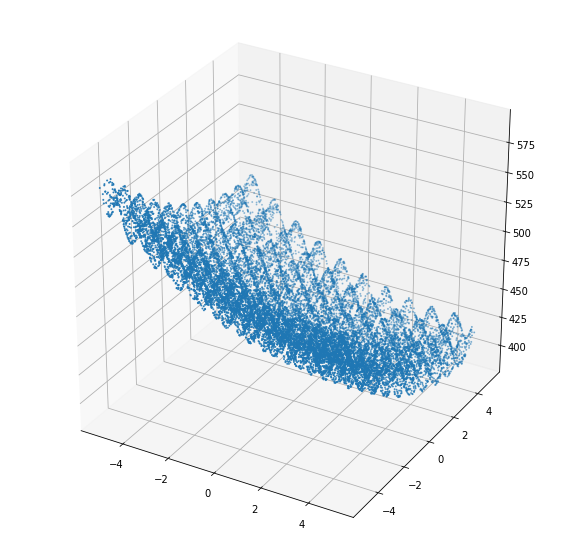

In [87]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, s=1)

In [88]:
D = 50

In [89]:
problem = ShiftedRastrigin(50)

algorithm = GeneticAlgorithm(
    problem=problem,
    population_size=100,
    offspring_population_size=100,
    mutation=PolynomialMutation(1.0 / problem.number_of_variables, 20.0),
    crossover=SBXCrossover(0.9, 20.0),
    selection=BinaryTournamentSelection(),
    termination_criterion=StoppingByEvaluations(max_evaluations=500000)
)

algorithm.run()
result = algorithm.get_result()

print('Algorithm: {}'.format(algorithm.get_name()))
print('Problem: {}'.format(problem.get_name()))
print('Solution: {}'.format(result.variables))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))

Algorithm: Genetic algorithm
Problem: ShiftedRastrigin
Solution: [3.8465479160249294, 4.323672280860987, -2.821574974517519, 0.6463532122934152, 4.338120106464098, 2.440956847769816, -3.459630005992861, 2.337187139359946, 3.979874690993432, 4.289914360227602, 2.3736750410328282, 3.2251576313388393, -0.023335575956203527, 4.6273862561612065, 4.613226205245334, 0.994512605717204, 1.6100666086370305, -4.725354799393009, -2.6974833694565588, 1.0355466730450344, -3.2048759109133305, 3.8057160692904257, -2.678252447629709, -3.2291536955576574, 4.411543784542293, 0.7153391032782377, -4.422008619966514, 1.4915032134900912, 0.7388100743577994, 2.1796888473334874, -3.2779163423989663, 2.783722725738286, 3.596187280873313, -4.719302884154255, 0.5173693266464352, -3.604455186066612, -3.203981985577465, 0.46818887976913365, -2.0300932866783414, -0.39840441457025483, -3.77111076023144, 4.968139981634454, 4.321402526644637, 3.354671964041472, -4.8657230151074735, 4.83206752693645, 0.21249422079561536

D = 500

In [90]:
problem = ShiftedRastrigin(500)

algorithm = GeneticAlgorithm(
    problem=problem,
    population_size=100,
    offspring_population_size=100,
    mutation=PolynomialMutation(1.0 / problem.number_of_variables, 20.0),
    crossover=SBXCrossover(0.9, 20.0),
    selection=BinaryTournamentSelection(),
    termination_criterion=StoppingByEvaluations(max_evaluations=500000)
)

algorithm.run()
result = algorithm.get_result()

print('Algorithm: {}'.format(algorithm.get_name()))
print('Problem: {}'.format(problem.get_name()))
print('Solution: {}'.format(result.variables))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))

Algorithm: Genetic algorithm
Problem: ShiftedRastrigin
Solution: [3.8344430686615096, 4.317985044819515, -2.817898608542574, 0.6416400065020892, 4.338924296479356, 2.442482705127579, -3.4607022989152316, 2.3349285969532745, 3.98039541705815, 4.2884585863009965, 2.374271464000398, 3.22351745748601, -0.02879608361486497, 4.631787191082956, 4.611135189846722, 0.9900165265037143, 1.6163642525062867, -4.724435904245934, -2.699529618981724, 1.039734684811931, -3.2001829593814906, 3.8032198973576157, -2.6728167482977767, -3.2249245292409974, 4.419249868817239, 0.7269648375739431, -4.423388588274171, 1.4895785026864465, 0.7442853985210549, 2.1785004118519264, -3.279387174264177, 2.779960740027798, 3.6003162929147083, -4.722399730686758, 0.5098863238854053, -3.6112643752880556, -3.218999603495055, 0.46801526422016054, -2.0353024994109705, -0.40216583203515266, -3.770393566230253, 4.976488261185777, 4.319656220865041, 2.357728832298968, -4.863095181157716, 4.8347780048269, 0.20940987286456944, -